In [4]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [5]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 8.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")

In [7]:
import os

# Specify the filename of your book text file
book_filename = "Book_one.txt"

# Check if the book file exists in the current directory
if os.path.isfile(book_filename):
    # Read the book text
    with open(book_filename, "r", encoding="utf-8") as file:
        book_text = file.read()

    # Process the book text with spaCy
    book_doc = NER(book_text)

    # Visualize identified entities
    displacy.render(book_doc[:2000], style="ent", jupyter=True)
else:
    print("Book file not found:", book_filename)


In [8]:

# Read characters
character_df = pd.read_csv("characters.csv")

name_mapping = {}

for index, row in character_df.iterrows():
    name = row['Name']
    variation = row['Variation']

    if pd.notna(variation):
        # Split the variations by semicolon and associate them with the name
        variation_list = variation.split(';')
        for variation in variation_list:
            name_mapping[variation.strip()] = name

processed_names = []

for index, row in character_df.iterrows():
    name = row['Name']
    variation = row['Variation']

    # Process the name and variations
    processed_name = name_mapping.get(name, name)
    processed_variation = []

    if pd.notna(variation):
        processed_variation = [name_mapping.get(variation.strip(), variation.strip()) for variation in variation.split(';')]

    # Store the processed names and variations
    processed_names.append(processed_name)
    processed_names.extend(processed_variation)


In [9]:
pd.set_option('display.max_rows', None)
character_df

Name                                          Variation
0                  Harry                    Harry Potter, The Boy who Lived
1                    Ron                                     Ronald Weasley
2               Hermione                                   Hermione Granger
3             Dumbledore   Professor Albus Dumbledore, Professor Dumbledore
4              Voldemort  Lord Voldemort, You Know Who, The Dark Lord, H...
5                 Hagrid                                      Rubeus Hagrid
6                  Draco                                       Draco Malfoy
7   Professor McGonagall                                            Minerva
8                  Snape            Severus Snape, Professor Snape, Severus
9     Professor Quirrell                                           Quirinus
10               Neville                                 Neville Longbottom
11          Uncle Vernon                         Vernon Dursley, Mr Dursley
12          Aunt Petunia                       Petunia Dursley, Mrs Dursley
13                Dudley                                     Dudley Dursley
14                Hedwig                                             Hedwig
15            Ollivander                Mr Ollivander, Garrick Ollivander, 
16                 James                                       James Potter
17                  Lily                                        Lily Potter
18                  Fred                                       Fred Weasley
19                George                                     George Weasley
20           Mrs Weasley                               Molly Weasley, Molly
21                 Percy                                      Percy Weasley
22                Hermes                                             Hermes
23       The Sorting Hat                                    The Sorting Hat
24              Mr Filch                                 Argus Filch, Filch
25               Nicolas                             Flamel, Nicolas Flamel
26                Oliver                                        Oliver Wood
27                   Lee                                         Lee Jordan
28                Seamus                                    Seamus Finnigan
29                Crabbe                                     Vincent Crabbe
30                 Goyle                                      Gregory Goyle
31               Charlie                                    Charlie Weasley
32           Madam Hooch                                        Madam Hooch
33  Nearly Headless Nick     Sir Nicholas, Sir Nicholas de Mimsy-Porpington
34      The Bloody Baron                                   The Bloody Baron
35          The Fat Lady                                       The Fat Lady
36                  Fang                                               Fang
37                Fluffy                                             Fluffy
38              Griphook                                           Griphook
39          Madam Malkin                                       Madam Malkin
40              Lavender                                     Lavender Brown
41                 Fudge               Cornelius Fudge, Cornelius, Minister
42                Emeric                                      Emeric Switch
43              Adalbert                                  Adalbert Waffling
44              Bathilda                                   Bathilda Bagshot
45               Miranda                                    Miranda Goshawk
46                  Newt                                     Newt Scamander
47              Phyllida                                     Phyllida Spore
48              Arsenius                                    Arsenius Jigger
49               Quentin                                    Quentin Trimble
50                Siruis                                Siruis Black, Black
51            Mrs Norris                                         Mrs

In [10]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [11]:
sent_entity_df

sentence  \
0     (/, \n\n\n\n\n, THE, BOY, WHO, LIVED, \n\n, Mr...   
1     (They, were, the, last, people, you, ’d, \n, e...   
2     (Mr., Dursley, was, the, director, of, a, firm...   
3     (He, was, a, big, ,, beefy, \n, man, with, har...   
4     (Mrs., Dursley, was, thin, and, \n, blonde, an...   
5     (The, Dursley, s, had, a, small, son, \n, call...   
6     (The, Dursleys, had, everything, they, wanted,...   
7     (They, did, n’t, think, they, \n, could, bear,...   
8     (Mrs., Potter, was, Mrs., Dursley, ’s, sister,...   
9     (The, Dursleys, shuddered, to, think, \n, what...   
10    (The, Dursleys, knew, that, the, Potters, had,...   
11    (This, boy, was, another, good, reason, for, k...   
12    (When, Mr., and, Mrs., Dursley, woke, up, on, ...   
13    (Mr., Dursley, hummed, as, he, picked, out, \n...   
14    (None, of, them, noticed, a, large, ,, tawny, ...   
15    (At, half, past, eight, ,, Mr., Dursley, picke...   
16    (“, Little, tyke, ,, ”, chortled, Mr., Dursley...   
17    (He, got, into, his, car, and, backed, \n, out...   
18    (It, was, on, the, corner, of, the, street, th...   
19    (For, a, second, ,, Mr., Dursley, did, n’t, re...   
20    (There, was, a, tabby, cat, standing, on, the,...   
21    (What, \n, could, he, have, been, thinking, of...   
22    (It, must, have, been, a, \n, trick, of, the, ...   
23    (Mr., Dursley, blinked, and, stared, at, \n, P...   
24                                (It, stared, back, .)   
25    (As, Mr., Dursley, drove, around, \n, the, cor...   
26    (It, was, now, reading, the, sign, that, said,...   
27    (Mr., Dursley, gave, himself, a, little, shake...   
28    (As, he, drove, toward, \n, town, he, thought,...   
29    (But, on, the, edge, of, town, ,, drills, were...   
30    (As, he, sat, in, the, usual, \n, morning, tra...   
31                              (People, in, cloaks, .)   
32    (Mr., Dursley, could, n’t, bear, \n, people, w...   
33    (He, supposed, this, was, some, \n, stupid, ne...   
34    (He, drummed, his, fingers, on, the, \n, steer...   
35    (They, were, whispering, \n, excitedly, togeth...   
36    (Mr., Dursley, was, enraged, to, see, \n, that...   
37                             (The, nerve, of, him, !)   
38    (But, then, it, \n, struck, Mr., Dursley, that...   
39                     (yes, ,, that, would, be, it, .)   
40    (The, traffic, moved, \n, on, and, a, few, min...   
41    (Mr., Dursley, always, sat, with, his, back, t...   
42    (If, he, had, n’t, ,, he, might, \n, have, fou...   
43    (He, did, n’t, see, the, owls, swooping, past,...   
44    (Most, of, them, had, never, seen, an, \n, owl...   
45    (Mr., Dursley, ,, however, ,, had, a, \n, perf...   
46     (He, yelled, at, five, \n, different, people, .)   
47    (He, made, several, important, telephone, \n, ...   
48    (He, was, in, a, very, good, \n, mood, until, ...   
49    (He, ’d, forgotten, all, about, the, people, i...   
50     (He, eyed, \n, them, angrily, as, he, passed, .)   
51    (He, did, n’t, know, why, ,, but, \n, they, ma...   
52    (This, bunch, were, whispering, \n, excitedly,...   
53    (It, was, on, his, way, back, past, them, ,, c...   
54    (“, The, Potters, ,, that, ’s, right, ,, that,...   
55                              (Fear, flooded, him, .)   
56    (He, \n, looked, back, at, the, whisperers, as...   
57    (He, dashed, back, across, the, road, ,, hurri...   
58    (He, put, \n, the, receiver, back, down, and, ...   
59                   (no, ,, he, was, being, stupid, .)   
60    (Potter, was, n’t, \n, such, an, unusual, name...   
61    (He, was, sure, there, were, lots, \n, of, peo...   
62    (Come, to, think, of, it, ,, he, was, n’t, eve...   
63             (He, ’d, never, even, seen, the, boy, .)   
64               (It, \n, might, have, been, Harvey, .)   
65                                      (Or, Harold, .)   
66    (There, was, no, \n, point, in, worrying, Mrs....   
67    (He, did, n’t, blame, \n, her

In [12]:

# Read characters CSV
character_df = pd.read_csv("characters.csv")

name_mapping = {}

# Iterate over the rows of the character DataFrame
for index, row in character_df.iterrows():
    name = row['Name']
    variation = row['Variation']

    if pd.notna(variation):
        # Split the variations by semicolon and associate them with the name
        variation_list = variation.split(';')
        for variation in variation_list:
            name_mapping[variation.strip()] = name

# Print the name_mapping dictionary
print(name_mapping)


{'Harry Potter, The Boy who Lived': 'Harry', 'Ronald Weasley': 'Ron', 'Hermione Granger': 'Hermione', 'Professor Albus Dumbledore, Professor Dumbledore': 'Dumbledore', 'Lord Voldemort, You Know Who, The Dark Lord, He Who Shall Not Be Named': 'Voldemort', 'Rubeus Hagrid': 'Hagrid', 'Draco Malfoy': 'Draco', 'Minerva': 'Professor McGonagall', 'Severus Snape, Professor Snape, Severus': 'Snape', 'Quirinus': 'Professor Quirrell', 'Neville Longbottom': 'Neville', 'Vernon Dursley, Mr Dursley': 'Uncle Vernon', 'Petunia Dursley, Mrs Dursley': 'Aunt Petunia', 'Dudley Dursley': 'Dudley', 'Hedwig': 'Hedwig', 'Mr Ollivander, Garrick Ollivander,': 'Ollivander', 'James Potter': 'James', 'Lily Potter': 'Lily', 'Fred Weasley': 'Fred', 'George Weasley': 'George', 'Molly Weasley, Molly': 'Mrs Weasley', 'Percy Weasley': 'Percy', 'Hermes': 'Hermes', 'The Sorting Hat': 'The Sorting Hat', 'Argus Filch, Filch': 'Mr Filch', 'Flamel, Nicolas Flamel': 'Nicolas', 'Oliver Wood': 'Oliver', 'Lee Jordan': 'Lee', 'Seam

In [13]:
def filter_entity(ent_list, character_df, name_mapping):
    character_names = character_df['Name'].tolist()
    variation = character_df['Variation'].tolist()
    processed_names = []

    for name, variation in zip(character_names, variation):
        processed_name = name_mapping.get(name, name)
        processed_variation = []

        if pd.notna(variation):
            processed_variation = [name_mapping.get(var.strip(), var.strip()) for var in variation.split(';')]

        processed_names.append(processed_name)
        processed_names.extend(processed_variation)

    return [ent for ent in ent_list if ent in processed_names]


In [14]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df, name_mapping))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

sentence  \
5    (The, Dursley, s, had, a, small, son, \n, call...   
11   (This, boy, was, another, good, reason, for, k...   
13   (Mr., Dursley, hummed, as, he, picked, out, \n...   
15   (At, half, past, eight, ,, Mr., Dursley, picke...   
54   (“, The, Potters, ,, that, ’s, right, ,, that,...   
61   (He, was, sure, there, were, lots, \n, of, peo...   
62   (Come, to, think, of, it, ,, he, was, n’t, eve...   
94   (She, told, \n, him, over, dinner, all, about,...   
96   (When, Dudley, had, been, put, to, bed, ,, he,...   
133  (Instead, he, said, ,, as, casually, as, he, c...   

                                              entities character_entities  
5                                    [Dursley, Dudley]           [Dudley]  
11                                   [Potters, Dudley]           [Dudley]  
13                          [Dursley, Dursley, Dudley]           [Dudley]  
15   [half past eight, Dursley, Dursley, Dudley, Du...   [Dudley, Dudley]  
54                       [The Potters, Harry, Dursley]            [Harry]  
61                                             [Harry]            [Harry]  
62                                             [Harry]            [Harry]  
94                                 [Next Door, Dudley]           [Dudley]  
96                                            [Dudley]           [Dudley]  
133                                           [Dudley]           [Dudley]

In [15]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [16]:
relationship_df = pd.DataFrame(relationships)

In [17]:
pd.set_option('display.max_rows', None)
relationship_df

source              target
0             Dumbledore           Voldemort
1             Dumbledore           Voldemort
2             Dumbledore           Voldemort
3             Dumbledore           Voldemort
4              Voldemort          Dumbledore
5              Voldemort          Dumbledore
6              Voldemort          Dumbledore
7              Voldemort          Dumbledore
8              Voldemort          Dumbledore
9             Dumbledore           Voldemort
10            Dumbledore           Voldemort
11            Dumbledore           Voldemort
12             Voldemort                Lily
13            Dumbledore           Voldemort
14             Voldemort                Lily
15                  Lily          Dumbledore
16             Voldemort                Lily
17                  Lily          Dumbledore
18             Voldemort                Lily
19                  Lily          Dumbledore
20                  Lily          Dumbledore
21                  Lily          Dumbledore
22                 Harry           Voldemort
23                 Harry           Voldemort
24             Voldemort          Dumbledore
25                 Harry           Voldemort
26             Voldemort          Dumbledore
27             Voldemort          Dumbledore
28             Voldemort          Dumbledore
29             Voldemort          Dumbledore
30            Dumbledore               Harry
31            Dumbledore               Harry
32                 Harry          Dumbledore
33                 Harry          Dumbledore
34                 Harry          Dumbledore
35                 Harry          Dumbledore
36                 Harry          Dumbledore
37            Dumbledore               Harry
38            Dumbledore               Harry
39            Dumbledore               Harry
40            Dumbledore               Harry
41                 Harry          Dumbledore
42            Dumbledore               Harry
43                 Harry          Dumbledore
44            Dumbledore               Harry
45                 Harry          Dumbledore
46                 Harry          Dumbledore
47                 Harry          Dumbledore
48            Dumbledore               Harry
49            Dumbledore               Harry
50                 Harry              Hagrid
51            Dumbledore               Harry
52                 Harry              Hagrid
53            Dumbledore               Harry
54                 Harry              Hagrid
55                Hagrid          Dumbledore
56            Dumbledore               Harry
57                 Harry              Hagrid
58                Hagrid          Dumbledore
59                 Harry              Hagrid
60                Hagrid          Dumbledore
61                Hagrid          Dumbledore
62                Hagrid          Dumbledore
63            Dumbledore              Hagrid
64            Dumbledore              Hagrid
65                Hagrid          Dumbledore
66            Dumbledore               Harry
67            Dumbledore              Hagrid
68                Hagrid          Dumbledore
69            Dumbledore               Harry
70                 Harry              Hagrid
71                Hagrid          Dumbledore
72            Dumbledore               Harry
73                 Harry              Hagrid
74                Hagrid               Harry
75                Hagrid          Dumbledore
76            Dumbledore               Harry
77                 Harry              Hagrid
78                Hagrid               Harry
79                 Harry              Hagrid
80                Hagrid          Dumbledore
81            Dumbledore               Harry
82                 Harry              Hagrid
83                Hagrid               Harry
84                 Harry              Hagrid
85            Dumbledore               Harry
86                 Harry              Hagrid
87                Hagrid               Harry
88           

In [22]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [23]:
relationship_df.head(10)

source      target  value
0  Dumbledore   Voldemort      9
1   Voldemort  Dumbledore     18
2   Voldemort        Lily      4
3        Lily  Dumbledore      5
4       Harry   Voldemort     56
5  Dumbledore       Harry    174
6       Harry  Dumbledore    166
7       Harry      Hagrid    453
8      Hagrid  Dumbledore     61
9  Dumbledore      Hagrid     33

In [24]:
# Create a graph from a pandas dataframe
import networkx as nx
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

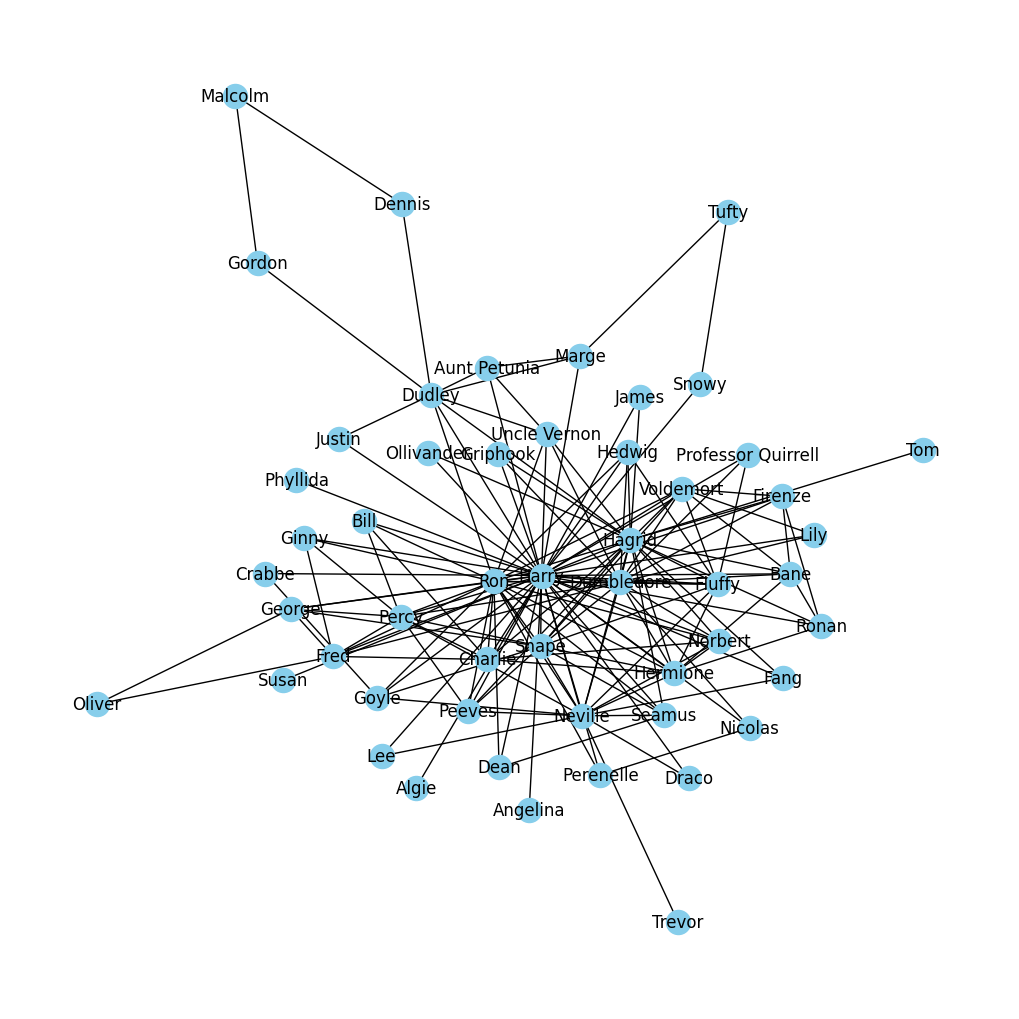

In [25]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [26]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white', cdn_resources='remote')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("harry.html")

harry.html


In [27]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Dumbledore': 0.37254901960784315,
 'Voldemort': 0.1764705882352941,
 'Lily': 0.058823529411764705,
 'Harry': 0.8627450980392157,
 'Hagrid': 0.45098039215686275,
 'James': 0.0392156862745098,
 'Dudley': 0.1764705882352941,
 'Aunt Petunia': 0.0784313725490196,
 'Uncle Vernon': 0.11764705882352941,
 'Snowy': 0.0392156862745098,
 'Tufty': 0.0392156862745098,
 'Marge': 0.0784313725490196,
 'Dennis': 0.0392156862745098,
 'Malcolm': 0.0392156862745098,
 'Gordon': 0.0392156862745098,
 'Phyllida': 0.0196078431372549,
 'Tom': 0.0196078431372549,
 'Professor Quirrell': 0.058823529411764705,
 'Griphook': 0.058823529411764705,
 'Ollivander': 0.0392156862745098,
 'Hedwig': 0.09803921568627451,
 'Ginny': 0.0784313725490196,
 'Percy': 0.21568627450980393,
 'George': 0.11764705882352941,
 'Fred': 0.1568627450980392,
 'Ron': 0.45098039215686275,
 'Neville': 0.3137254901960784,
 'Lee': 0.0392156862745098,
 'Bill': 0.0784313725490196,
 'Charlie': 0.1568627450980392,
 'Crabbe': 0.0392156862745098,
 'Goyl

<AxesSubplot: >

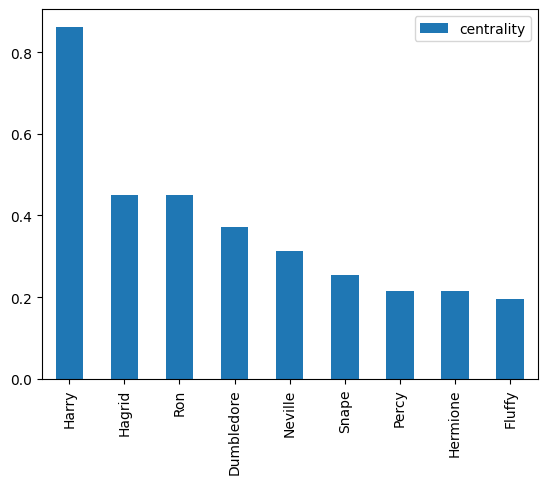

In [28]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot: >

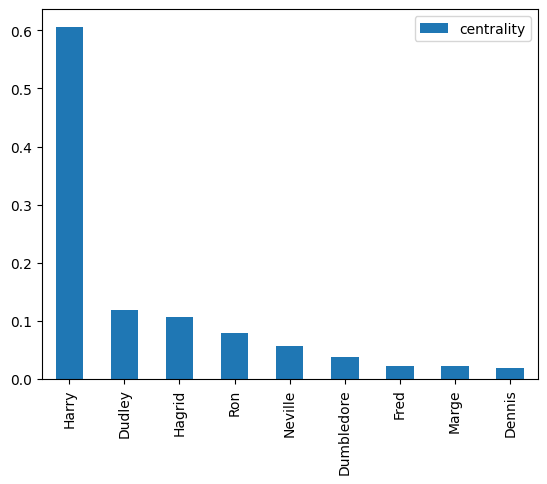

In [29]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot: >

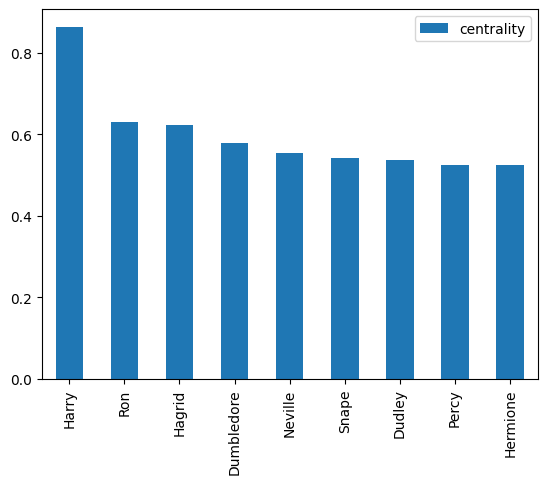

In [30]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [31]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [32]:
from community import community_louvain

In [33]:
communities = community_louvain.best_partition(G)

In [34]:
communities

{'Dumbledore': 0,
 'Voldemort': 0,
 'Lily': 0,
 'Harry': 1,
 'Hagrid': 0,
 'James': 1,
 'Dudley': 3,
 'Aunt Petunia': 3,
 'Uncle Vernon': 3,
 'Snowy': 3,
 'Tufty': 3,
 'Marge': 3,
 'Dennis': 3,
 'Malcolm': 3,
 'Gordon': 3,
 'Phyllida': 1,
 'Tom': 0,
 'Professor Quirrell': 0,
 'Griphook': 0,
 'Ollivander': 1,
 'Hedwig': 0,
 'Ginny': 2,
 'Percy': 2,
 'George': 2,
 'Fred': 2,
 'Ron': 2,
 'Neville': 1,
 'Lee': 1,
 'Bill': 2,
 'Charlie': 2,
 'Crabbe': 1,
 'Goyle': 1,
 'Susan': 1,
 'Justin': 3,
 'Seamus': 2,
 'Algie': 1,
 'Hermione': 0,
 'Snape': 2,
 'Peeves': 2,
 'Dean': 2,
 'Oliver': 2,
 'Angelina': 1,
 'Fluffy': 0,
 'Perenelle': 1,
 'Norbert': 0,
 'Draco': 1,
 'Fang': 1,
 'Ronan': 0,
 'Bane': 0,
 'Firenze': 0,
 'Trevor': 1,
 'Nicolas': 1}

In [35]:
nx.set_node_attributes(G, communities, 'group')

In [36]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white', cdn_resources='remote')
com_net.from_nx(G)
com_net.show("harry_communities.html")

harry_communities.html


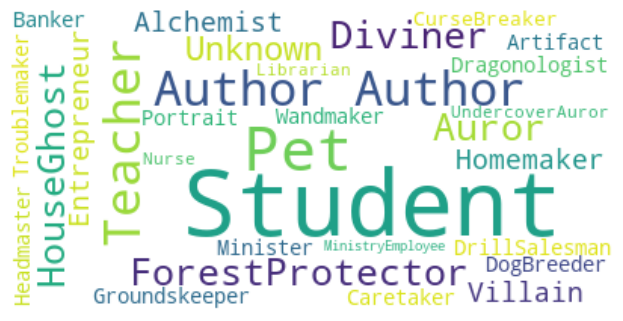

In [37]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image


# Read the CSV file
data = pd.read_csv('character_occupation.csv')

# Extract the professions from the data
professions = data['Occupation'].dropna().tolist()

# Join the professions into a single string
text = ' '.join(professions)

# Create the word cloud
wordcloud = WordCloud(background_color='white', max_font_size=60, relative_scaling=0.5).generate(text)


# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()